# Natural language processing

### plan warsztatu:
1.Wstęp teoretyczny
2.Implementacja prostego chatbota
3.Chatbot - ćwiczenie
4. kaggle

## Co to jest i do czego służy?
### NLP to dziedzina w informatyce zwiazana ze sztuszną inteligencją. Skupia się na interakcjach miedzy komputerami a ludźmi. Wykorzystywana jest w: 
### - rozpoznawaniu mowy
### - tłumaczeniach 


#### London is the capital and most populous city of England and the United Kingdom. Standing on the River Thames in the south east of the island of Great Britain, London has been a major settlement for two millennia. It was founded by the Romans, who named it Londinium.
 (Source: Wikipedia article “London”)
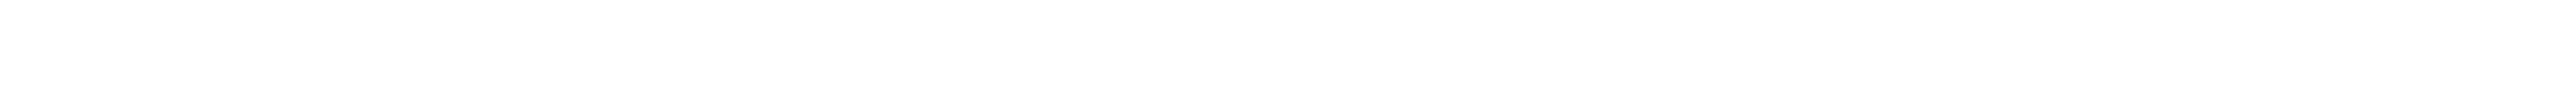

## Segmentacja tekstu
#### “London is the capital and most populous city of England and the United Kingdom.”
#### “Standing on the River Thames in the south east of the island of Great Britain, London has been a major settlement for two millennia.”
#### “It was founded by the Romans, who named it Londinium.”

## Tokenizacja
#### “London”, “is”, “ the”, “capital”, “and”, “most”, “populous”, “city”, “of”, “England”, “and”, “the”, “United”, “Kingdom”

## Lematyzacja
#### “London”, “be” , “ the”, “capital”, “and”, “most”, “populous”, “city”, “of”, “England”, “and”, “the”, “United”, “Kingdom”

## Identyfikacja słów nieważnych (ang. Stop-words)
#### “London”, “capital”, “populous”, “city”, “England”, “United”, “Kingdom”

## Importujemy potrzebne biblioteki

In [1]:
import nltk
import numpy as np
import random
import string 

#### lower() - pozbywamy się wielkich liter
#### wordnet - baza danych słów w języku agielskim
#### punkt - token pozwalający na podział tekstu na zdania
#### sent_tokenize() - funkcja, która pozwala nam na zamiane tekstu w liste zdań
#### word_tokenize() -  funkcja, która pozwala nam na zamiane zdań w liste słów

In [2]:
f=open('chatbot.txt','r',errors = 'ignore')
raw=f.read()
raw=raw.lower()
nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only
sent_tokens = nltk.sent_tokenize(raw)
word_tokens = nltk.word_tokenize(raw)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maja1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maja1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
sent_tokens

['a chatbot is a piece of software that conducts a conversation via auditory or textual methods.',
 '[1] such programs are often designed to convincingly simulate how a human would behave as a conversational partner, although as of 2019, they are far short of being able to pass the turing test.',
 '[2] chatbots are typically used in dialog systems for various practical purposes including customer service or information acquisition.',
 'some chatbots use sophisticated natural language processing systems, but many simpler ones scan for keywords within the input, then pull a reply with the most matching keywords, or the most similar wording pattern, from a database.']

In [4]:
word_tokens[1:5]

['chatbot', 'is', 'a', 'piece']

##### We shall now define a function called LemTokens which will take as input the tokens and return normalized tokens.

##### Aby dokonać lematyzacji, należy pobrać WordNetLematizer() oraz stworzyć jego instancję.
##### Następnie wywołujemy funkcję lemmatize(), jako argument podajemy pojedyncze słowo.

In [5]:
lemmer = nltk.stem.WordNetLemmatizer()

# 
def LemTokens(words):
    return [lemmer.lemmatize(word) for word in words]

# translation table - a dictionary
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [6]:
LemTokens(sent_tokens)

['a chatbot is a piece of software that conducts a conversation via auditory or textual methods.',
 '[1] such programs are often designed to convincingly simulate how a human would behave as a conversational partner, although as of 2019, they are far short of being able to pass the turing test.',
 '[2] chatbots are typically used in dialog systems for various practical purposes including customer service or information acquisition.',
 'some chatbots use sophisticated natural language processing systems, but many simpler ones scan for keywords within the input, then pull a reply with the most matching keywords, or the most similar wording pattern, from a database.']

In [7]:
test_sentence = 'Hej co tam! halo? Czesc..'
LemNormalize(test_sentence)

['hej', 'co', 'tam', 'halo', 'czesc']

##### Next, we shall define a function for a greeting by the bot i.e if a user’s input is a greeting, 
the bot shall return a greeting response.ELIZA uses a simple keyword matching for greetings.
We will utilize the same concept here.

In [8]:
GREETING_INPUTS = ["hello", "hi", "greetings", "sup", "what's up","hey",]
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

 ##### From scikit learn library, import the TFidf vectorizer to convert a collection of raw documents to a matrix of TF-IDF features. cosine_similarity will be used to find the similarity between words entered by the user and the words in the corpus. This is the simplest possible implementation of a chatbot.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### TfidfVectorizer
#### Term Frequency (TF)
##### ilosc występowan danego słowa podzielona na ilosc wszystkich słów
#### Inverse Data Frequency (IDF)
##### mierzy ważnośc danego słowa, podczs obliczania TF każde słowo jest traktowane tak samo, Jednak w tekscie często pojawiają się słowa tj. "of", "is" a nie są ważne. Dlatego musimy zmiejszyć wagę czesto pojawiających się słów i zwiekszyć wagę słów pojawiających się rzadko. Wzor = log(liczba_wszystkich_dokumentów/liczba_dokumentów_z_danym_słowem) 
##### Example:
##### Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.




In [10]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [ ]:
flag=True
print("ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("ROBO: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("ROBO: "+greeting(user_response))
            else:
                print("ROBO: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("ROBO: Bye! take care..")

ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!
